# Stock Forecasting using Prophet (Uncertainty in the trend)

https://facebook.github.io/prophet/

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'AMD' # input
start = '2017-01-01' # input 
end = '2021-11-08'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


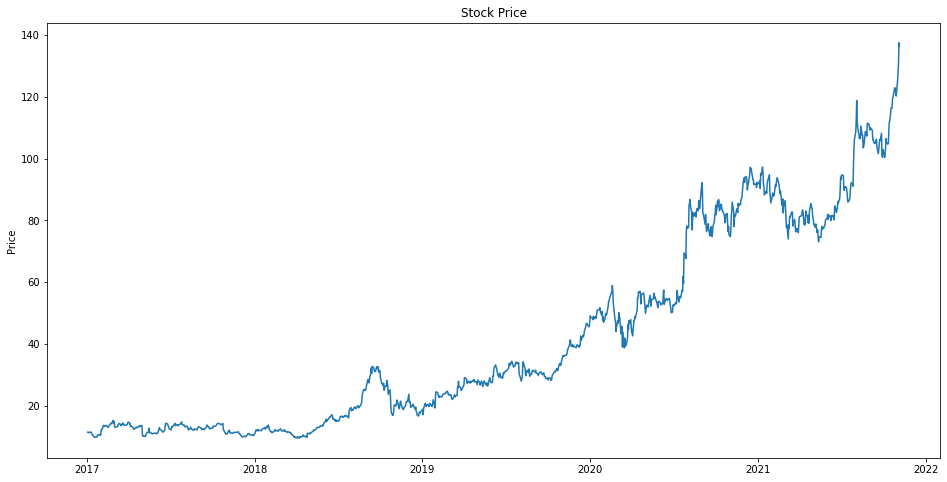

In [3]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [4]:
df = df.reset_index()
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df

,ds,Open,High,Low,y,Adj Close,Volume
0,2017-01-03,11.420000,11.650000,11.020000,11.430000,11.430000,55182000
1,2017-01-04,11.450000,11.520000,11.240000,11.430000,11.430000,40781200
2,2017-01-05,11.430000,11.690000,11.230000,11.240000,11.240000,38855200
3,2017-01-06,11.290000,11.490000,11.110000,11.320000,11.320000,34453500
4,2017-01-09,11.370000,11.640000,11.310000,11.490000,11.490000,37304800
...,...,...,...,...,...,...,...
1216,2021-11-01,119.449997,125.669998,118.129997,125.230003,125.230003,54559800
1217,2021-11-02,124.980003,128.460007,124.199997,127.629997,127.629997,53491900
1218,2021-11-03,127.750000,130.600006,126.790001,130.529999,130.529999,59537800
1219,2021-11-04,132.009995,139.000000,130.770004,137.500000,137.500000,84825200


In [5]:
df = df[['ds', 'y']]
df

,ds,y
0,2017-01-03,11.430000
1,2017-01-04,11.430000
2,2017-01-05,11.240000
3,2017-01-06,11.320000
4,2017-01-09,11.490000
...,...,...
1216,2021-11-01,125.230003
1217,2021-11-02,127.629997
1218,2021-11-03,130.529999
1219,2021-11-04,137.500000


In [6]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [7]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1581,2022-11-01
1582,2022-11-02
1583,2022-11-03
1584,2022-11-04
1585,2022-11-05


In [8]:
m = Prophet(mcmc_samples=300)
forecast = m.fit(df).predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


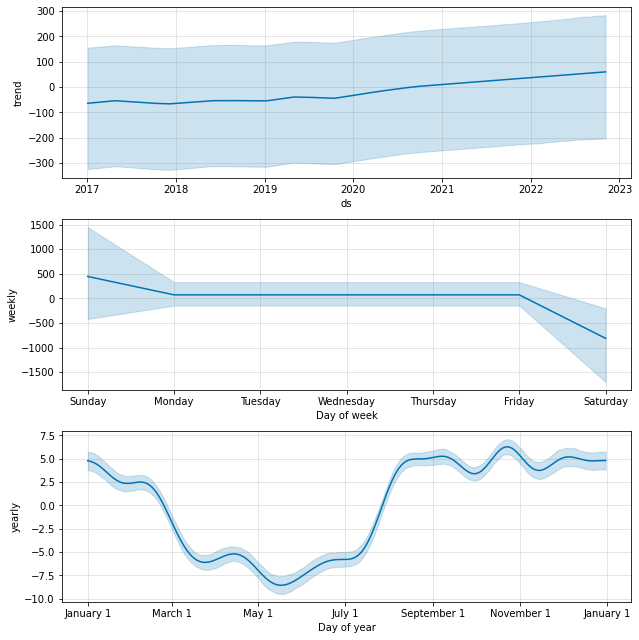

In [9]:
fig = m.plot_components(forecast)
